In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

计算60-3kmTP的结果，绘制基本的降水、温度的平均图

In [2]:
dir_in = "/raid52/yycheng/MPAS/TP_60-3km/pre_daily/mask_res/"
ds_obs_2012 = xr.open_dataset(dir_in + "mask_CN05.1_2012_07.nc")
ds_obs_2015 = xr.open_dataset(dir_in + "mask_CN05.1_2015_07.nc")

ds_reinit_2012 = xr.open_dataset(dir_in + "mask_pre_daily_2012_reinit.nc")
ds_reinit_2015 = xr.open_dataset(dir_in + "mask_pre_daily_2015_reinit.nc")

ds_run_2012 = xr.open_dataset(dir_in + "mask_pre_daily_2012_run.nc")
ds_run_2015 = xr.open_dataset(dir_in + "mask_pre_daily_2015_run.nc")

In [3]:
# 应急处理下：因为需要的是三小时降水的累计，这里先计算一下平均（是每日三小时降水的平均，不是每日的累计！）
# *8 得到每日的降水累计
obs_2012_mean = ds_obs_2012['pre'].mean('time')
obs_2015_mean = ds_obs_2015['pre'].mean('time')

run_2012_mean = ds_run_2012['precip_MPAS'].mean('Time')
run_2015_mean = ds_run_2015['precip_MPAS'].mean('Time')

reinit_2012_mean = ds_reinit_2012['precip_MPAS'].mean('Time')
reinit_2015_mean = ds_reinit_2015['precip_MPAS'].mean('Time')

In [4]:
# 降水CMAP
import matplotlib.colors as mcolors
# draw filled contours.
clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
# In future MetPy
# norm, cmap = ctables.registry.get_with_boundaries('precipitation', clevs)
cmap_data = [(1.0, 1.0, 1.0),
             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
             (0.0, 1.0, 1.0),
             (0.0, 0.8784313797950745, 0.501960813999176),
             (0.0, 0.7529411911964417, 0.0),
             (0.501960813999176, 0.8784313797950745, 0.0),
             (1.0, 1.0, 0.0),
             (1.0, 0.6274510025978088, 0.0),
             (1.0, 0.0, 0.0),
             (1.0, 0.125490203499794, 0.501960813999176),
             (0.9411764740943909, 0.250980406999588, 1.0),
             (0.501960813999176, 0.125490203499794, 1.0),
             (0.250980406999588, 0.250980406999588, 1.0),
             (0.125490203499794, 0.125490203499794, 0.501960813999176),
             (0.125490203499794, 0.125490203499794, 0.125490203499794),
             (0.501960813999176, 0.501960813999176, 0.501960813999176),
             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
             (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
             (0.4000000059604645, 0.20000000298023224, 0.0)]
cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
norm = mcolors.BoundaryNorm(clevs, cmap.N)

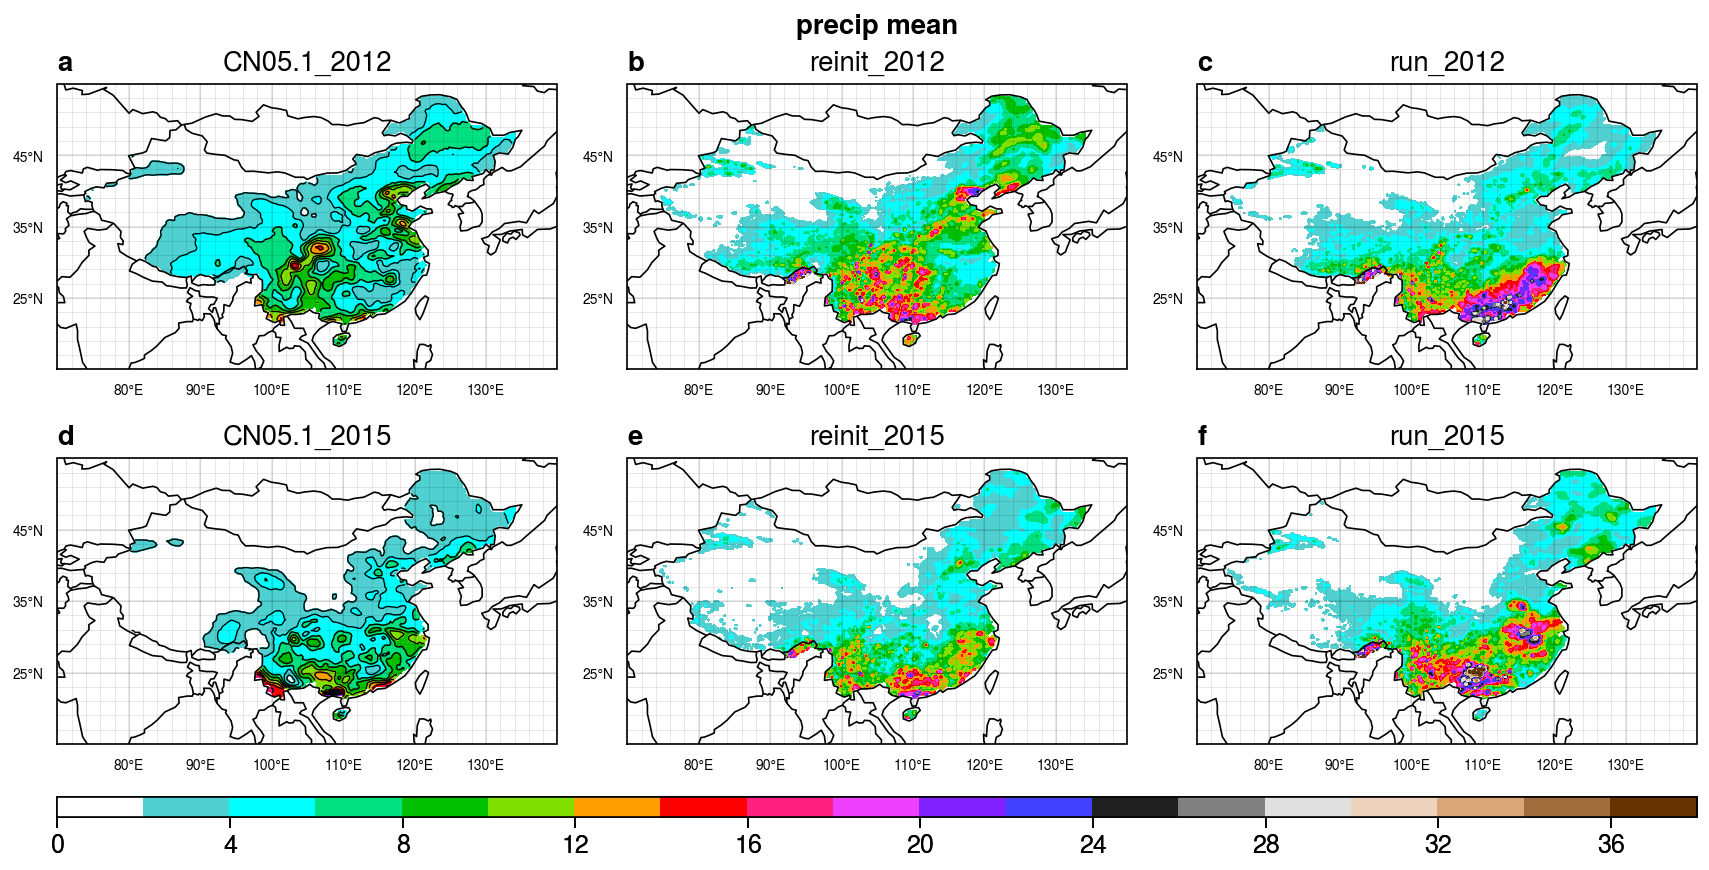

In [26]:
# import proplot as plot
from matplotlib import pyplot as plt
import proplot as plot
# ----- get filter vars coords-----

lon = run_2012_mean.longitude.values
lat = run_2012_mean.latitude.values

ticks = np.arange(0,40,2.)
#----- create plot -----
fig, axs = plot.subplots(ncols=3,nrows=2, proj=('cyl'))

#-----2012-----
axs[0].format(title='CN05.1_2012')
m = axs[0].contour(lon, lat, obs_2012_mean,\
levels=ticks,color='k',
linewidth = .5)
m_overlay = axs[0].contourf(lon, lat, obs_2012_mean,\
levels=ticks,
cmap=cmap)

# m = axs[1].contour(lon, lat, reinit_2012_mean,\
# levels=ticks,color='k',
# linewidth = .5)
axs[1].format(title='reinit_2012')
m_overlay = axs[1].contourf(lon, lat, reinit_2012_mean,\
levels=ticks,
cmap=cmap)

# m = axs[2].contour(lon, lat, run_2012_mean,\
# levels=ticks,color='k',
# linewidth = .5)
axs[2].format(title='run_2012')
m_overlay = axs[2].contourf(lon, lat, run_2012_mean,\
levels=ticks,
cmap=cmap)

#-----2015-----
m = axs[3].contour(lon, lat, obs_2015_mean,\
levels=ticks,color='k',
linewidth = .5)
axs[3].format(title='CN05.1_2015')
m_overlay = axs[3].contourf(lon, lat, obs_2015_mean,\
levels=ticks,
cmap=cmap)

# m = axs[1].contour(lon, lat, reinit_2015_mean,\
# levels=ticks,color='k',
# linewidth = .5)
axs[4].format(title='reinit_2015')
m_overlay = axs[4].contourf(lon, lat, reinit_2015_mean,\
levels=ticks,
cmap=cmap)

# m = axs[2].contour(lon, lat, run_2015_mean,\
# levels=ticks,color='k',
# linewidth = .5)
axs[5].format(title='run_2015')
m_overlay = axs[5].contourf(lon, lat, run_2015_mean,\
levels=ticks,
cmap=cmap)
# format作为整个proplot集中对属性进行修改的method
axs.format(
abc=True,
lonlim=(70, 140), latlim=(15, 55), coast=True,
#-----GEO axis-----
borders = True,
labels = True,
gridlabelsize = 5,
gridminor = True,
# ticklen = 10,
# borderslinewidth=.5,
# longridminor= False,
# latgridminor= False,
# lonminorlocator = 
longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
lonlocator = np.arange(70,150,10),
latlocator = np.arange(15,65,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(15,55+2,2),
#-----line label-----
# linewidth = 0.5,
suptitle="precip mean",
)
#----- add contour tick labels -----
# axs.clabel(m, inline=True, fontsize=5, colors = 'k', fmt='%4.0f',use_clabeltext=True, inline_spacing=0)
fig.colorbar(m_overlay, loc='b', cmap=cmap, width=0.1)
# fig.colorbar(m_overlay, loc='b', length = 1., width=0.1,
# ticklabelsize=5,ticks=ticks)

fig.patch.set_facecolor('white')
plt.savefig('./output_pic/precip_spatial.png', dpi=300, facecolor= "white")